Автор: Лейман М.А.   
Дата создания: 22.03.2025  

# Задание ZALA  
## 4. Детектирование множества объектов
### Модель __YOLOv8s__ 

## Импорты

In [1]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





import warnings
warnings.filterwarnings("ignore")


print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)

Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/devsTraining/zala_task


In [2]:

import warnings
from IPython.display import clear_output
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
import pandas as pd
from torch.optim import lr_scheduler
from torch import Tensor
import torch.nn as nn
#from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models
import copy
import torch.optim as optim
import time
from torchsummary import summary  # для вывода информации о модели
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from matplotlib import rcParams
from skimage import img_as_ubyte
import random


import torch

from PIL import Image






#from tqdm.notebook import tqdm
from tqdm import tqdm

from torch.utils.data.sampler import SubsetRandomSampler  
from torchsummary import summary


from PIL import Image
import imageio

sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
# np.random.seed(42)
#set_global_seed(42)
rcParams['figure.figsize'] = (14,6)

## Проверка GPU

In [3]:
# устанавливаем device если gpu или cpu


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.6.0+cu124
версия  cuDNN:           90100
Sat Mar 29 22:24:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:01:00.0  On |                  N/A |
|  0%   52C    P5             23W /  170W |     652MiB /  12288MiB |     26%      Default |
|                                         

In [4]:
# Получаем текущую директорию
path_dir = os.getcwd()
print("Текущая директория:", path_dir)

DATA_DIR = os.path.abspath(os.path.join(path_dir, 'dataset'))
print("Путь к dataset:", DATA_DIR)


Текущая директория: /home/maksim/develops/python/devsTraining/zala_task
Путь к dataset: /home/maksim/develops/python/devsTraining/zala_task/dataset


## Обучение

### Yolo

In [5]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
from IPython.display import clear_output
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
import pandas as pd
from torch.optim import lr_scheduler
from torch import Tensor
import torch.nn as nn
#from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models
import copy
import torch.optim as optim
import time
from torchsummary import summary  # для вывода информации о модели
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from matplotlib import rcParams
from skimage import img_as_ubyte
import random

#from tqdm.notebook import tqdm
from tqdm import tqdm

from torch.utils.data.sampler import SubsetRandomSampler  
from torchsummary import summary


from PIL import Image
import imageio

sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
# np.random.seed(42)
#set_global_seed(42)
rcParams['figure.figsize'] = (14,6)

In [6]:
from ultralytics import YOLO
# model = YOLO("models/yolo11s.pt")
# model = YOLO("models/yolov8s.pt")  # Загружаем предобученную модель
model = YOLO("models/11s_best.pt")

In [9]:
# ['auto', 'Adam', 'SGD', 'AdamW', 'Adamax', 'NAdam', 'RAdam']

import os
import time
from IPython.display import clear_output  
for opt in ['AdamW']:
    for mosaic in [0]:
        for lr00 in [0.00001]:
            for iou0 in [0.5]:
                for batch in [8]:
                    # Очистка экрана перед каждой новой тренировкой
                    os.system('cls' if os.name == 'nt' else 'clear')  # Для терминала
                    clear_output(wait=True)  

                    print(f"Запуск тренировки: opt={opt}, batch={batch}, mosaic={mosaic}, lr0={lr00}, iou={iou0}")
                    
                    model.train(
                        data="data.yaml",
                        epochs=50,
                        imgsz=512,
                        batch=batch,
                        device="cuda",
                        lr0=lr00,
                        lrf=0.1,
                        momentum=0.951,
                        weight_decay=0.001,
                        optimizer=opt,
                        cache=True,
                        mosaic=mosaic,
                        single_cls=False,
                        patience=20,
                        verbose=False,
                        freeze=1,
                        iou=iou0,  # Исправлено: iou0 передаётся в параметр iou
                    )

                    time.sleep(1)  # Небольшая задержка, чтобы увидеть обновление (можно убрать)


Запуск тренировки: opt=AdamW, batch=8, mosaic=0, lr0=1e-05, iou=0.5
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
engine/trainer: task=detect, mode=train, model=models/11s_best.pt, data=data.yaml, epochs=50, time=None, patience=20, batch=8, imgsz=512, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=1, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

train: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/train.cache... 4720 images, 328 backgrounds, 0 corrupt: 100%|██████████| 4720/4720 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/images/train/41_aug5.jpg: 1 duplicate labels removed


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.9GB RAM): 100%|██████████| 4720/4720 [00:16<00:00, 282.47it/s]
val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/val.cache... 169 images, 9 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 169/169 [00:00<00:00, 281.46it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=1e-05, momentum=0.951) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.08G     0.9812     0.5214     0.8404        106        512: 100%|██████████| 590/590 [00:48<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.04it/s]

                   all        169       3814      0.604      0.458      0.465      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.08G     0.8312     0.4406     0.8174        117        512: 100%|██████████| 590/590 [00:46<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.95it/s]

                   all        169       3814      0.706      0.436      0.483      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.08G     0.7777     0.4155       0.81        168        512: 100%|██████████| 590/590 [00:45<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.95it/s]

                   all        169       3814      0.698      0.431      0.473      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.08G     0.7434     0.4003     0.8077        221        512: 100%|██████████| 590/590 [00:45<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.99it/s]

                   all        169       3814      0.681      0.428      0.475      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.08G     0.7377     0.3976     0.8073        222        512: 100%|██████████| 590/590 [00:45<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.92it/s]

                   all        169       3814      0.664       0.44      0.469      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.08G     0.7507     0.4031     0.8082        128        512: 100%|██████████| 590/590 [00:45<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.07it/s]

                   all        169       3814      0.698      0.423      0.472      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.08G     0.7564     0.4041     0.8087         88        512: 100%|██████████| 590/590 [00:45<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.98it/s]

                   all        169       3814      0.656      0.439      0.472       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.08G     0.7585     0.4042     0.8104        102        512: 100%|██████████| 590/590 [00:45<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.83it/s]

                   all        169       3814      0.728      0.429      0.473       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.08G     0.7653     0.4068     0.8106        180        512: 100%|██████████| 590/590 [00:45<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.00it/s]

                   all        169       3814      0.694       0.43      0.473      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.08G      0.765      0.407     0.8102        267        512: 100%|██████████| 590/590 [00:45<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.72it/s]

                   all        169       3814      0.636      0.444      0.469      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.08G     0.8265     0.4278     0.8186        145        512: 100%|██████████| 590/590 [00:45<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.02it/s]

                   all        169       3814      0.603       0.45      0.466      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.08G     0.8226      0.427     0.8169        164        512: 100%|██████████| 590/590 [00:45<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.87it/s]

                   all        169       3814      0.652      0.441      0.467      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.08G     0.8235     0.4271     0.8191        100        512: 100%|██████████| 590/590 [00:45<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.90it/s]

                   all        169       3814      0.682      0.439      0.469      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.08G     0.8199     0.4249     0.8189        116        512: 100%|██████████| 590/590 [00:44<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.12it/s]

                   all        169       3814       0.69      0.445      0.476      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.08G      0.829     0.4296     0.8182        123        512: 100%|██████████| 590/590 [00:45<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.11it/s]

                   all        169       3814      0.632      0.443      0.466      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.08G     0.8361     0.4321     0.8191        112        512: 100%|██████████| 590/590 [00:45<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.97it/s]

                   all        169       3814      0.661      0.434      0.466      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.08G     0.8447     0.4353     0.8194         83        512: 100%|██████████| 590/590 [00:45<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.95it/s]

                   all        169       3814      0.625      0.447       0.47      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.08G     0.8474     0.4364     0.8192        102        512: 100%|██████████| 590/590 [00:45<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.82it/s]

                   all        169       3814      0.616      0.465      0.476      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.08G     0.8346     0.4313     0.8199        135        512: 100%|██████████| 590/590 [00:45<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.96it/s]

                   all        169       3814       0.59      0.454      0.473      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.08G      0.841     0.4345     0.8202        193        512: 100%|██████████| 590/590 [00:45<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.79it/s]

                   all        169       3814       0.64      0.442      0.472      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.08G     0.8353     0.4321     0.8184        162        512: 100%|██████████| 590/590 [00:45<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.17it/s]

                   all        169       3814      0.616      0.456       0.47      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.08G     0.8398     0.4343     0.8204        123        512: 100%|██████████| 590/590 [00:45<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.70it/s]

                   all        169       3814      0.615       0.44       0.47      0.269
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



22 epochs completed in 0.286 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 19.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.94it/s]


                   all        169       3814      0.709      0.437      0.483      0.279
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2


### Первая итерация обучения 

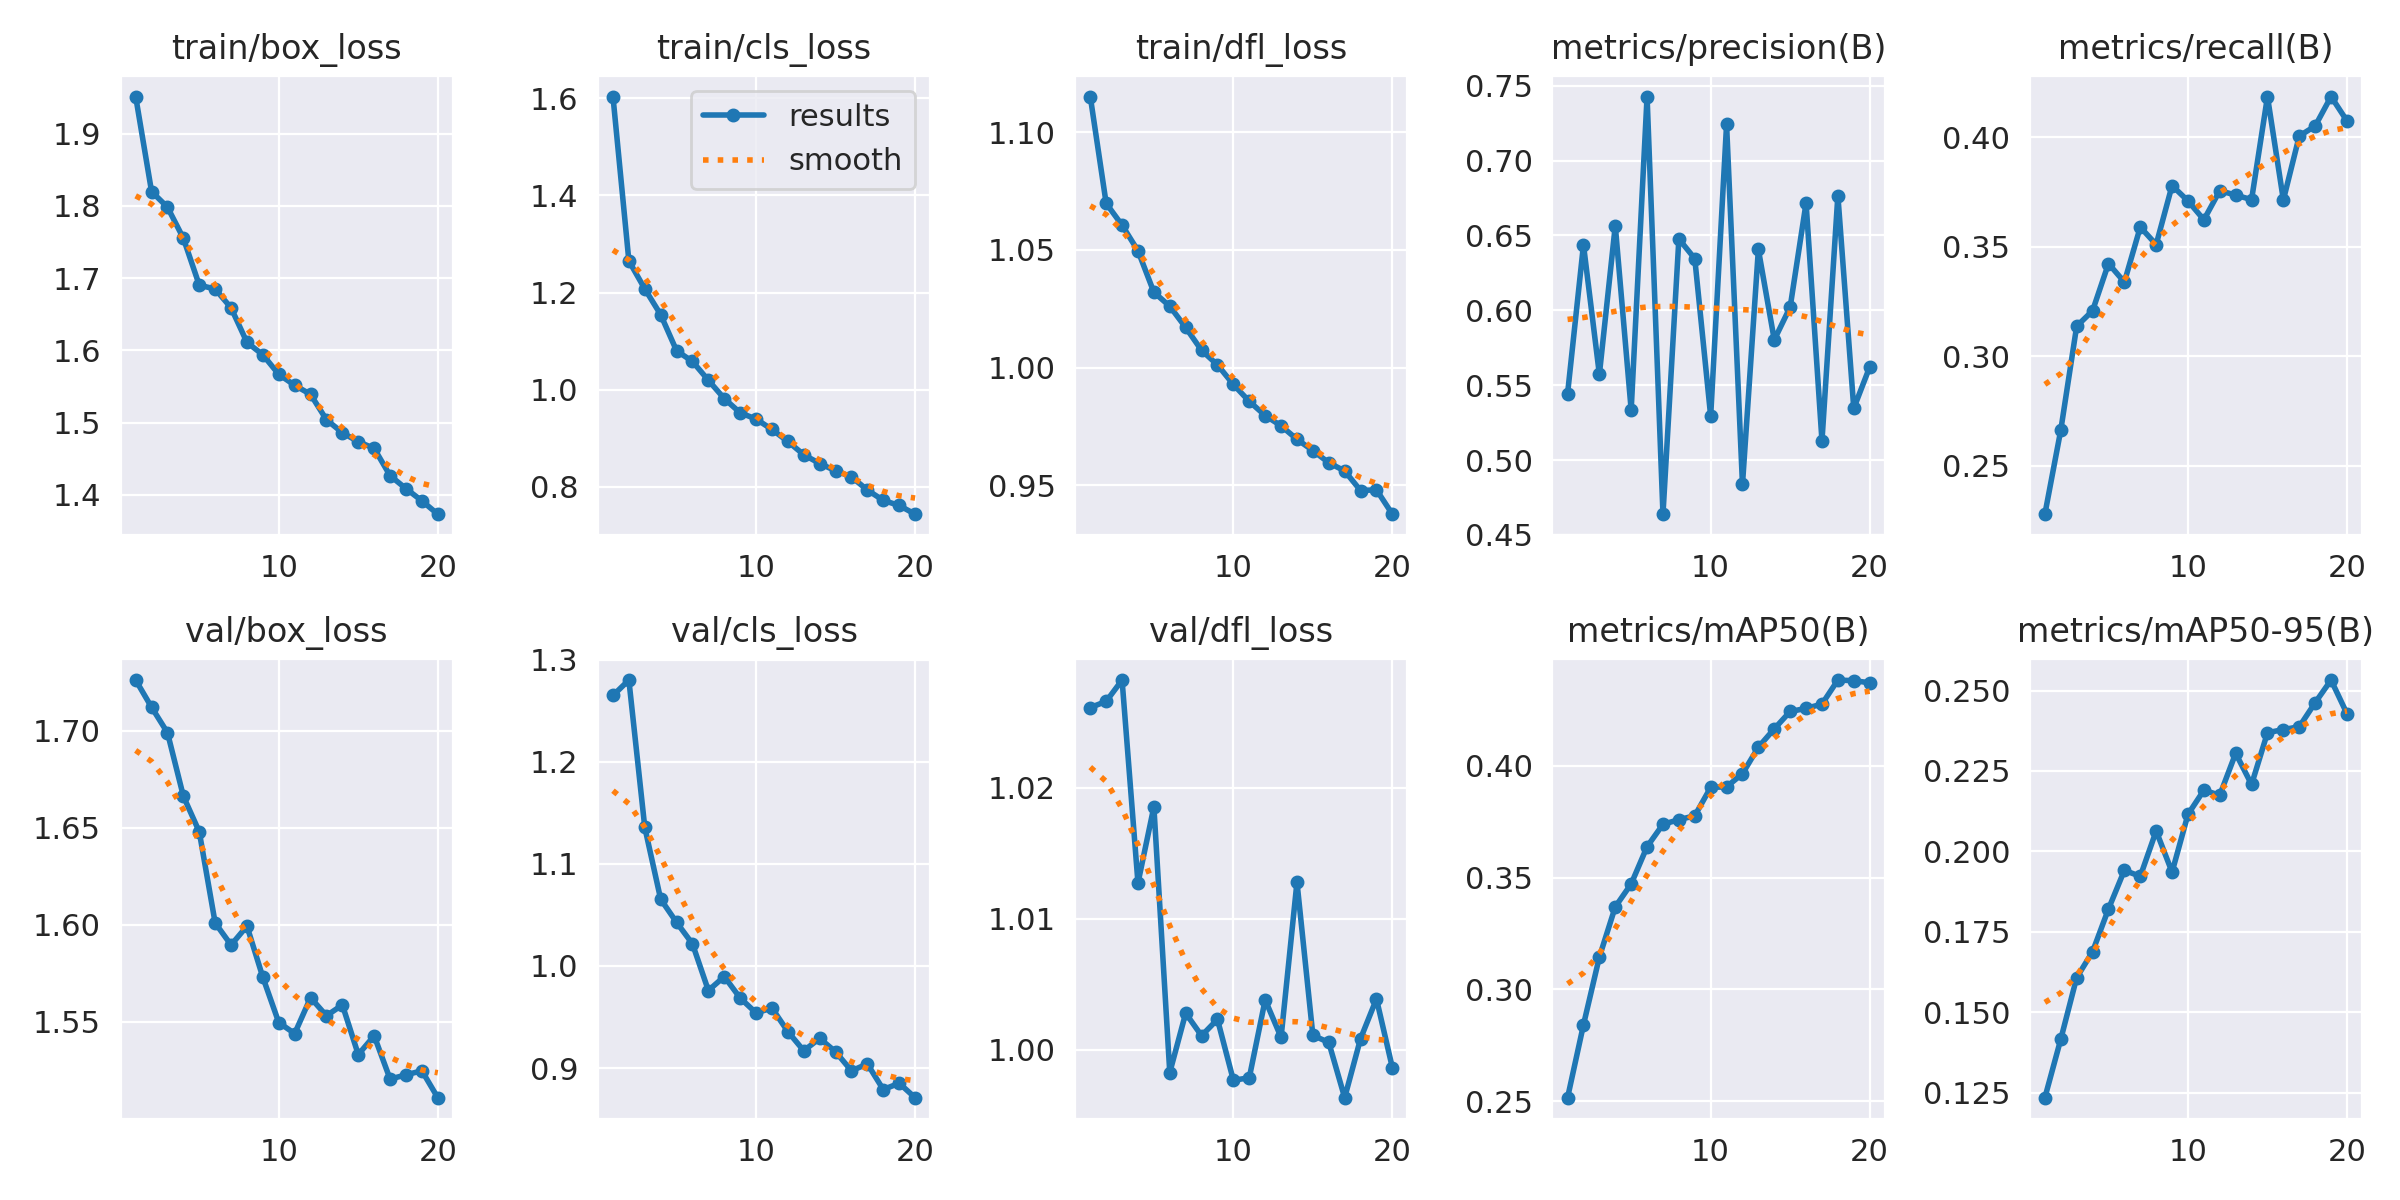



In [10]:
def metrics_model(model, split="test", iou=0.5):
    metrics = model.val(data="data.yaml", split=split, iou=iou)
    precision = metrics.box.p.mean().item()  # Precision
    recall = metrics.box.r.mean().item()  # Recall
    map50 = metrics.box.map50.mean().item()  # AP50 (IoU=0.5)
    map50_95 = metrics.box.maps.mean().item()  # mAP50-95

    # Выводим итоговые метрики
    print("\n=== Итоговые метрики по тестовому набору ===")
    print(f"Средняя точность (Precision): {precision:.3f}")
    print(f"Средняя полнота (Recall): {recall:.3f}")
    print(f"Средняя AP50 (IoU={iou:.2f}): {map50:.3f}")
    print(f"Средний mAP50-95: {map50_95:.3f}")

In [11]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/test.cache... 85 images, 4 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 85/85 [00:00<00:00, 290.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.60it/s]


                   all         85       1656      0.726      0.462      0.509      0.308
Speed: 0.4ms preprocess, 8.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train22

=== Итоговые метрики по тестовому набору ===
Средняя точность (Precision): 0.726
Средняя полнота (Recall): 0.462
Средняя AP50 (IoU=0.50): 0.509
Средний mAP50-95: 0.308


In [13]:
metrics_model(model, split="test", iou=0.4)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/test.cache... 85 images, 4 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]


                   all         85       1656      0.692      0.478       0.53      0.314
              building         59       1080      0.761      0.789      0.772      0.448
 cultivation-mesh-cage         11         57      0.761      0.825      0.753      0.535
             landslide          3          5      0.607        0.2      0.319      0.198
                  pool          7         10          1      0.541      0.725       0.44
   prefabricated-house         50        298      0.868      0.698      0.755      0.423
                quarry          7          8      0.703        0.5      0.648      0.442
                  ship         21        129      0.729      0.326      0.412      0.163
               vehicle         16         36       0.33      0.123      0.119     0.0389
                  well         20         33      0.472      0.303      0.269      0.138
Speed: 1.5ms preprocess, 5.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect

In [14]:
metrics_model(model, split="test", iou=0.6)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/test.cache... 85 images, 4 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]


                   all         85       1656      0.679      0.478      0.526      0.311
              building         59       1080      0.745      0.792      0.772      0.445
 cultivation-mesh-cage         11         57      0.759      0.825       0.75      0.531
             landslide          3          5      0.607        0.2      0.319      0.198
                  pool          7         10          1      0.541      0.693      0.426
   prefabricated-house         50        298      0.843      0.698      0.752       0.42
                quarry          7          8      0.703        0.5      0.643      0.438
                  ship         21        129      0.687      0.333      0.418      0.168
               vehicle         16         36      0.296      0.111      0.114     0.0375
                  well         20         33      0.472      0.303       0.27      0.138
Speed: 0.9ms preprocess, 3.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect

In [22]:
model.info()

YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs


(100, 9416670, 0, 21.3212672)

In [21]:
model.info()


YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs


(100, 9416670, 0, 21.3212672)